In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import prince 
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm

%matplotlib inline

#To display all columns
pd.set_option('display.max_columns', None)

# show float rounded by 2
pd.options.display.float_format = "{:.2f}".format

In [2]:

raw_outcomes = pd.read_csv("../Outsystem test/kdd-cup-2014-predicting-excitement-at-donors-choose/outcomes.csv/outcomes.csv")

In [3]:
raw_projects = pd.read_csv("../Outsystem test/kdd-cup-2014-predicting-excitement-at-donors-choose/projects.csv/projects.csv") 

In [4]:
raw_donations =pd.read_csv("../Outsystem test/kdd-cup-2014-predicting-excitement-at-donors-choose/donations.csv/donations.csv") 

In [5]:
raw_outcomes.set_index('projectid', inplace = True)
raw_projects.set_index('projectid', inplace = True)
raw_donations.set_index('projectid', inplace = True)

In [6]:
#joining date of the project with outcomes
df_outcomes = raw_outcomes.join(raw_projects['date_posted'], how ='left')
df_outcomes.head()

,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count,date_posted
projectid,,,,,,,,,,,,
ffffc4f85b60efc5b52347df489d0238,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,2009-10-11
ffffac55ee02a49d1abc87ba6fc61135,f,f,t,t,f,t,f,f,57.00,0.00,7.00,2011-06-11
ffff97ed93720407d70a2787475932b0,f,f,t,t,t,t,t,f,100.00,0.00,3.00,2010-09-11
ffff418bb42fad24347527ad96100f81,f,f,f,t,t,f,f,f,100.00,0.00,1.00,2009-04-03
ffff2d9c769c8fb5335e949c615425eb,t,t,t,t,t,f,t,f,63.00,6.00,2.00,2013-03-03


In [7]:
df_outcomes = df_outcomes[df_outcomes.date_posted < '2014-01-01']



In [8]:
# % of exciting projects
len(df_outcomes[df_outcomes.is_exciting=='t'])/len(df_outcomes)

0.05927411411760527

## Exploratory Data analysis 

In [9]:
col =['is_exciting','fully_funded','at_least_1_teacher_referred_donor','great_chat','at_least_1_green_donation',
      'three_or_more_non_teacher_referred_donors','one_non_teacher_referred_donor_giving_100_plus',
      'donation_from_thoughtful_donor'
     ]




out_true=[]
out_false=[]
out_not_null =[]
for n in col:
    out_true.append(len(df_outcomes[df_outcomes[n]=='t']))
    out_false.append(len(df_outcomes[df_outcomes[n]=='f']))
    out_not_null.append(df_outcomes[pd.notnull(df_outcomes[n])].shape[0])

out_grouped =pd.DataFrame({'count_True':out_true,'count_False':out_false, 'total':out_not_null}, index= col)

out_grouped['Percent_True'] = out_grouped.count_True/out_grouped.total

out_grouped['Percent_False'] = out_grouped.count_False/out_grouped.total

out_grouped



,count_True,count_False,total,Percent_True,Percent_False
is_exciting,36710,582616,619326,0.06,0.94
fully_funded,430683,188643,619326,0.70,0.30
at_least_1_teacher_referred_donor,124660,400268,524928,0.24,0.76
great_chat,187170,432156,619326,0.30,0.70
at_least_1_green_donation,378693,146235,524928,0.72,0.28
three_or_more_non_teacher_referred_donors,272378,252550,524928,0.52,0.48
one_non_teacher_referred_donor_giving_100_plus,377809,147119,524928,0.72,0.28
donation_from_thoughtful_donor,6936,517992,524928,0.01,0.99


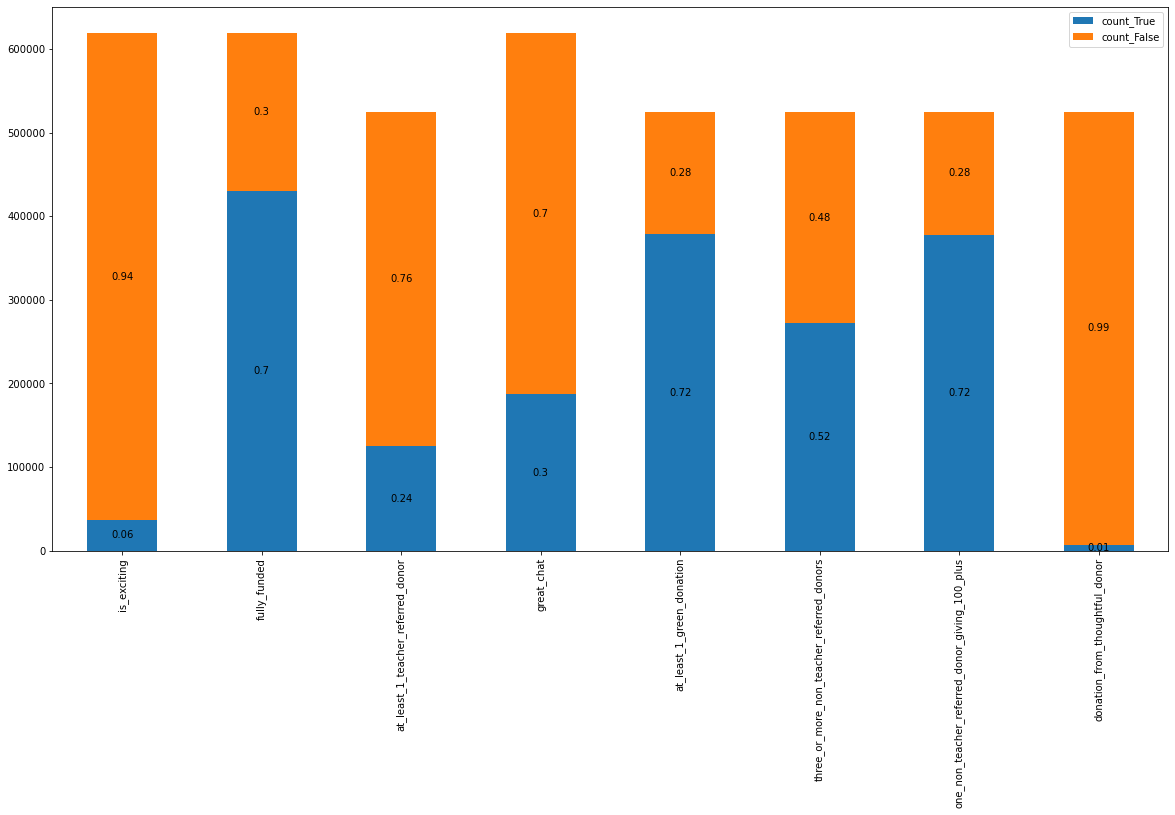

In [10]:
list_values = (out_grouped['Percent_True'].append(out_grouped['Percent_False']))

ax=out_grouped[['count_True', 'count_False']].plot(kind='bar', stacked=True,figsize=(20,10))


for rect, value in zip(ax.patches, list_values):
    if value != 0:
        h = rect.get_height() /2.
        w = rect.get_width() /2.
        x, y = rect.get_xy()
        ax.text(x+w, y+h,round(value,2),horizontalalignment='center',verticalalignment='center')



Transforming fields in dummy variables

In [11]:
dummies = pd.get_dummies(df_outcomes[['is_exciting', 'at_least_1_teacher_referred_donor', 'fully_funded',
       'at_least_1_green_donation', 'great_chat',
       'three_or_more_non_teacher_referred_donors',
       'one_non_teacher_referred_donor_giving_100_plus',
       'donation_from_thoughtful_donor']],drop_first=True)
dummies

,is_exciting_t,at_least_1_teacher_referred_donor_t,fully_funded_t,at_least_1_green_donation_t,great_chat_t,three_or_more_non_teacher_referred_donors_t,one_non_teacher_referred_donor_giving_100_plus_t,donation_from_thoughtful_donor_t
projectid,,,,,,,,
ffffc4f85b60efc5b52347df489d0238,0,0,0,0,0,0,0,0
ffffac55ee02a49d1abc87ba6fc61135,0,0,1,1,0,1,0,0
ffff97ed93720407d70a2787475932b0,0,0,1,1,1,1,1,0
ffff418bb42fad24347527ad96100f81,0,0,0,1,1,0,0,0
ffff2d9c769c8fb5335e949c615425eb,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...
0000ee613c92ddc5298bf63142996a5c,0,1,1,1,0,1,1,0
0000b38bbc7252972f7984848cf58098,0,0,1,1,0,0,1,0
00002d691c05c51a5fdfbb2baef0ba25,0,0,0,0,1,1,0,0


In [12]:
df_outcomes['dum_at_least_1_teacher_referred_donor']=dummies['at_least_1_teacher_referred_donor_t']
df_outcomes['dum_fully_funded']=dummies['fully_funded_t']
df_outcomes['dum_at_least_1_green_donation']=dummies['at_least_1_green_donation_t']
df_outcomes['dum_great_chat']=dummies['great_chat_t']
df_outcomes['dum_three_or_more_non_teacher_referred_donors']=dummies['three_or_more_non_teacher_referred_donors_t']
df_outcomes['dum_one_non_teacher_referred_donor_giving_100_plus']=dummies['one_non_teacher_referred_donor_giving_100_plus_t']
df_outcomes['dum_donation_from_thoughtful_donor']=dummies['donation_from_thoughtful_donor_t']

df_outcomes['dum_is_exciting']=dummies['is_exciting_t']

In [13]:
df_outcomes.columns

Index(['is_exciting', 'at_least_1_teacher_referred_donor', 'fully_funded',
       'at_least_1_green_donation', 'great_chat',
       'three_or_more_non_teacher_referred_donors',
       'one_non_teacher_referred_donor_giving_100_plus',
       'donation_from_thoughtful_donor', 'great_messages_proportion',
       'teacher_referred_count', 'non_teacher_referred_count', 'date_posted',
       'dum_at_least_1_teacher_referred_donor', 'dum_fully_funded',
       'dum_at_least_1_green_donation', 'dum_great_chat',
       'dum_three_or_more_non_teacher_referred_donors',
       'dum_one_non_teacher_referred_donor_giving_100_plus',
       'dum_donation_from_thoughtful_donor', 'dum_is_exciting'],
      dtype='object')

### find correlations

In [14]:
corrmat =df_outcomes[['dum_at_least_1_teacher_referred_donor', 'dum_fully_funded',
       'dum_at_least_1_green_donation', 'dum_great_chat',
       'dum_three_or_more_non_teacher_referred_donors',
       'dum_one_non_teacher_referred_donor_giving_100_plus',
       'dum_donation_from_thoughtful_donor', 'dum_is_exciting']].corr()
corrmat.sort_values(by='dum_is_exciting',ascending=False)['dum_is_exciting']

dum_is_exciting                                      1.00
dum_at_least_1_teacher_referred_donor                0.50
dum_great_chat                                       0.38
dum_three_or_more_non_teacher_referred_donors        0.21
dum_at_least_1_green_donation                        0.20
dum_fully_funded                                     0.17
dum_one_non_teacher_referred_donor_giving_100_plus   0.07
dum_donation_from_thoughtful_donor                   0.04
Name: dum_is_exciting, dtype: float64

<AxesSubplot:>

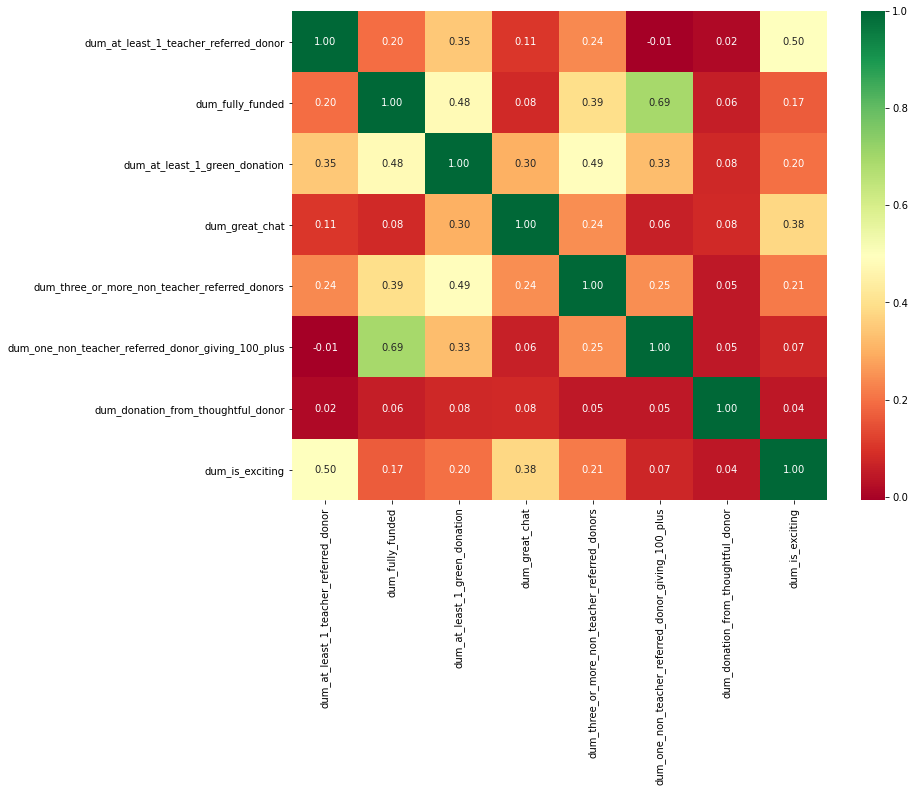

In [15]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,cmap='RdYlGn',fmt='.2f',annot=True,)

## Chis Square test

In [16]:
cols =['at_least_1_teacher_referred_donor', 'fully_funded',
       'at_least_1_green_donation', 'great_chat',
       'three_or_more_non_teacher_referred_donors',
       'one_non_teacher_referred_donor_giving_100_plus']
      

##creating df for chi square

df_chi_square=pd.DataFrame()
chi=[]
pval=[]
dof=[]
critical_value=[]
cramer_test=[]

## Critical value table for chi square

significance = 0.001
p = 1 - significance


for col in cols:
    contingency_table = pd.crosstab(df_outcomes.is_exciting,df_outcomes[col])
    chi_x, pval_x, dof_x, exp_x = chi2_contingency(contingency_table)
    chi.append(chi_x)
    pval.append(pval_x)
    dof.append(dof_x)
    critical_value_x = chi2.ppf(p, dof_x)
    critical_value.append(critical_value_x)
    n=len(df_outcomes.dropna()) ### number on the sample
    cramer_test_x= np.sqrt(chi_x/(n*dof_x)) ##cramer's V test formula
    cramer_test.append(round(cramer_test_x,2))

df_chi_square['cols']=cols
df_chi_square['chi2']=chi
df_chi_square['pval']=pval
df_chi_square['dof']=dof
df_chi_square['critical value']=critical_value
df_chi_square['flg_critical']=df_chi_square['chi2']>df_chi_square['critical value']
df_chi_square['flg_pval'] =df_chi_square['pval']<0.005
df_chi_square['cramer_test']=cramer_test
df_chi_square

,cols,chi2,pval,dof,critical value,flg_critical,flg_pval,cramer_test
0,at_least_1_teacher_referred_donor,126729.75,0.00,1,10.83,True,True,0.54
1,fully_funded,17090.92,0.00,1,10.83,True,True,0.20
2,at_least_1_green_donation,15240.24,0.00,1,10.83,True,True,0.19
3,great_chat,90096.65,0.00,1,10.83,True,True,0.45
4,three_or_more_non_teacher_referred_donors,18659.20,0.00,1,10.83,True,True,0.21
5,one_non_teacher_referred_donor_giving_100_plus,235.31,0.00,1,10.83,True,True,0.02


In [17]:
#Contingency table for outcomes

col=['fully_funded','at_least_1_teacher_referred_donor','great_chat','at_least_1_green_donation'
     ]
pd.crosstab(raw_outcomes.is_exciting,
            [raw_outcomes.fully_funded,raw_outcomes.at_least_1_teacher_referred_donor,raw_outcomes.great_chat,
             raw_outcomes.at_least_1_green_donation
            ],
            colnames=col
    )
#at_least_1_teacher_referred_donor is the variable with more inmpact


fully_funded                           f                                   \
at_least_1_teacher_referred_donor      f                          t         
great_chat                             f             t            f         
at_least_1_green_donation              f      t      f      t     f     t   
is_exciting                                                                 
f                                  26305  14343  17311  21085  1184  6215   
t                                      0      0      0      0     0     0   

fully_funded                                      t                        \
at_least_1_teacher_referred_donor                 f                         
great_chat                           t            f              t          
at_least_1_green_donation            f     t      f       t      f      t   
is_exciting                                                                 
f                                  932  7281  84610  137641  11939  87034   
t                                    0     0      0       0      0      0   

fully_funded                                                
at_least_1_teacher_referred_donor     t                     
great_chat                            f           t         
at_least_1_green_donation             f      t    f      t  
is_exciting                                                 
f                                  3041  64441  913   3943  
t                                     0      0    0  36710

## Projects
### Categorical Variables

In [18]:
#joining projects with oucomes and donations
df_projects = raw_projects.join(raw_outcomes[['is_exciting','at_least_1_teacher_referred_donor','great_chat']], how ='left')

In [19]:
df_projects=df_projects[df_projects.date_posted<'2014-01-01']


get dummies for is_excting

In [20]:
df_projects['exciting_project']= pd.get_dummies(df_projects.is_exciting,drop_first=True)

### Schools

In [21]:
# Number of schools in the dataset
len(df_projects.schoolid.unique())

55296

In [22]:
##Schools with excting project
len(df_projects[df_projects.is_exciting=='t'].schoolid.unique())

15924

In [23]:
#Percent of schools with exciting projects
len(df_projects[df_projects.is_exciting=='t'].schoolid.unique())/len(df_projects.schoolid.unique())

0.2879774305555556

#### Serch for schools with at least one project as excting and insert flg_school_exchool_exciting on df

In [24]:
school_exciting =df_projects[df_projects.is_exciting=='t'].reset_index().groupby(by='schoolid').count()
school_exciting['flg_school_exciting']=1
school_exciting.rename(columns={'projectid': 'count_proj_school'}, inplace=True)
df_projects = df_projects.join(school_exciting[['count_proj_school','flg_school_exciting']], how='left', on='schoolid')



In [25]:
df_projects['count_proj_school'] = df_projects['count_proj_school'].fillna(0)
df_projects['flg_school_exciting'] = df_projects['flg_school_exciting'].fillna(0)

In [26]:
df_projects.groupby('flg_school_exciting').schoolid.nunique()

flg_school_exciting
0.00    39372
1.00    15924
Name: schoolid, dtype: int64

Text(0.5, 1.0, 'Schools with at least one exciting Project')

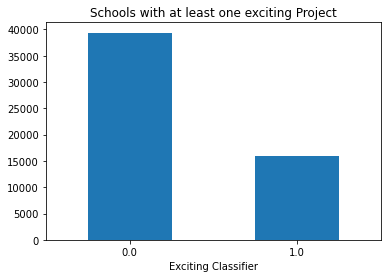

In [27]:

df_projects.groupby('flg_school_exciting').schoolid.nunique().plot(kind='bar', stacked=True)

plt.xlabel('Exciting Classifier')
plt.xticks(rotation=0)
plt.title('Schools with at least one exciting Project')

Create a grouped dataframe for school

In [28]:
##group categories of school

group_school = df_projects[['schoolid', 'school_city', 'school_state', 
       'school_metro', 'school_district', 'school_county', 'school_charter',
       'school_magnet', 'school_year_round', 'school_nlns', 'school_kipp',
       'school_charter_ready_promise','poverty_level','flg_school_exciting']].groupby(by=['schoolid', 'school_city', 'school_state', 
       'school_metro', 'school_district', 'school_county', 'school_charter',
       'school_magnet', 'school_year_round', 'school_nlns', 'school_kipp',
       'school_charter_ready_promise','poverty_level'],dropna=False).max().reset_index()

#group=df_projects[['schoolid','is_exciting']].groupby('schoolid').count()
group_school.set_index('schoolid', inplace=True)

In [29]:
group_school.head()

,school_city,school_state,school_metro,school_district,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,poverty_level,flg_school_exciting
schoolid,,,,,,,,,,,,,
0000a0030fbd97fe1a05441df1cc9751,Barnum,MN,rural,Barnum Ind School District 91,Carlton,f,f,f,f,f,f,high poverty,0.00
0000efec25428001c9dd83f651c5d181,Fabens,TX,NaN,Fabens Ind School District,El Paso,f,f,f,f,f,f,high poverty,0.00
00014d8717dd762910c815aceb2e5521,Garland,TX,suburban,Garland Ind School District,Dallas,f,f,f,f,f,f,highest poverty,0.00
000284c382d4503b4e5517aa780f55d0,Cincinnati,OH,suburban,West Clermont Local Sch Dist,Clermont,f,f,f,f,f,f,moderate poverty,0.00
00048c38df121d553b5a59cd0ecf71b2,Charlotte,NC,urban,Charlotte-mecklenburg Sch Dist,Mecklenburg,f,f,f,f,f,f,moderate poverty,0.00


In [30]:
# group sum continuos variable

group= df_projects[['schoolid','fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached','exciting_project']].groupby(by='schoolid',dropna=False).sum()

group_school = group_school.join(group, how='left')

In [31]:
# group count of projects
group_school['count_projects']=df_projects.reset_index()[['schoolid','projectid']].groupby(by='schoolid',dropna=False).count()['projectid']


In [32]:
group_school.describe()

,flg_school_exciting,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,exciting_project,count_projects
count,55296.00,55296.00,55296.00,55296.00,55296.00,55296.00,55296.00
mean,0.29,288.49,6003.10,7146.74,1091.09,0.66,11.20
std,0.45,650.83,45981.77,55962.83,8460.63,1.85,25.39
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.00,35.00,726.42,861.60,80.00,0.00,2.00
50%,0.00,95.00,1763.95,2094.43,272.00,0.00,4.00
75%,1.00,261.00,5166.32,6144.23,916.00,1.00,10.00
max,1.00,21749.00,10263500.70,12516464.30,1005015.00,52.00,902.00


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


(0.0, 100.0)

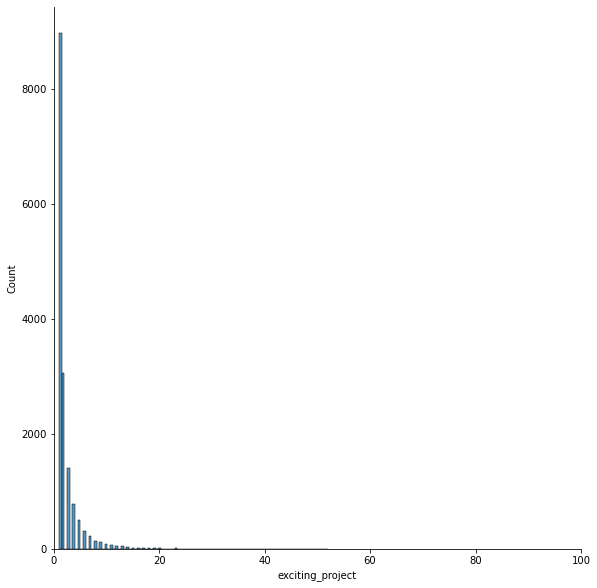

In [33]:
sns.displot(group_school[group_school.flg_school_exciting==1]['exciting_project'],bins=100,kde=False, 
            height=8.27, ax=ax)
plt.xlim(0, 100)

Chi square for categorical with school

In [34]:
cols =['school_city', 'school_state', 'school_metro', 'school_district',
       'school_county', 'school_charter', 'school_magnet', 'school_year_round',
       'school_nlns', 'school_kipp', 'school_charter_ready_promise','poverty_level'
      ]

##creating df for chi square

df_chi_square=pd.DataFrame()
chi=[]
pval=[]
dof=[]
critical_value=[]
cramer_test=[]

## Critical value table for chi square

significance = 0.005
p = 1 - significance


for col in cols:
    contingency_table = pd.crosstab(group_school.flg_school_exciting,group_school[col])
    chi_x, pval_x, dof_x, exp_x = chi2_contingency(contingency_table)
    chi.append(chi_x)
    pval.append(pval_x)
    dof.append(dof_x)
    critical_value_x = chi2.ppf(p, dof_x)
    critical_value.append(critical_value_x)
    n=len(df_projects.dropna()) ### number on the sample
    cramer_test_x= np.sqrt(chi_x/(n*dof_x)) ##cramer's V test formula
    cramer_test.append(round(cramer_test_x,2))

df_chi_square['cols']=cols
df_chi_square['chi2']=chi
df_chi_square['pval']=pval
df_chi_square['dof']=dof
df_chi_square['critical value']=critical_value
df_chi_square['flg_critical']=df_chi_square['chi2']>df_chi_square['critical value']
df_chi_square['flg_pval'] =df_chi_square['pval']<0.05
df_chi_square['cramer_test']=cramer_test
df_chi_square

,cols,chi2,pval,dof,critical value,flg_critical,flg_pval,cramer_test
0,school_city,11597.07,0.00,8832,9178.10,True,True,0.00
1,school_state,1166.00,0.00,51,80.75,True,True,0.01
2,school_metro,1736.31,0.00,2,10.60,True,True,0.05
3,school_district,12382.96,0.00,9042,9392.14,True,True,0.00
4,school_county,5411.75,0.00,1688,1841.42,True,True,0.00
5,school_charter,440.07,0.00,1,7.88,True,True,0.04
6,school_magnet,170.25,0.00,1,7.88,True,True,0.02
7,school_year_round,7.74,0.01,1,7.88,False,True,0.01
8,school_nlns,127.40,0.00,1,7.88,True,True,0.02
9,school_kipp,153.45,0.00,1,7.88,True,True,0.02


Text(0.5, 1.0, 'Count Schools')

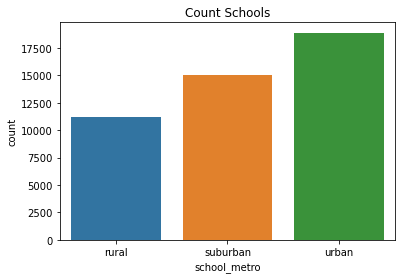

In [35]:
sns.countplot(x='school_metro',data=group_school, order=group_school.school_metro.dropna().unique())
plt.title('Count Schools')

Text(0.5, 1.0, 'Count Schools with exciting projects')

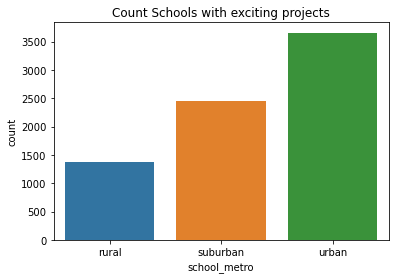

In [36]:
sns.countplot(x='school_metro',data=group_school[group_school.exciting_project==1], 
              order=group_school.school_metro.dropna().unique())
plt.title('Count Schools with exciting projects')

In [37]:
corrmat = group_school[[
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
        'count_projects','exciting_project','flg_school_exciting']].corr()
corrmat


,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,count_projects,exciting_project,flg_school_exciting
total_price_excluding_optional_support,1.00,1.00,0.08,0.28,0.17,0.09
total_price_including_optional_support,1.00,1.00,0.08,0.27,0.17,0.09
students_reached,0.08,0.08,1.00,0.25,0.16,0.09
count_projects,0.28,0.27,0.25,1.00,0.62,0.34
exciting_project,0.17,0.17,0.16,0.62,1.00,0.56
flg_school_exciting,0.09,0.09,0.09,0.34,0.56,1.00


<AxesSubplot:>

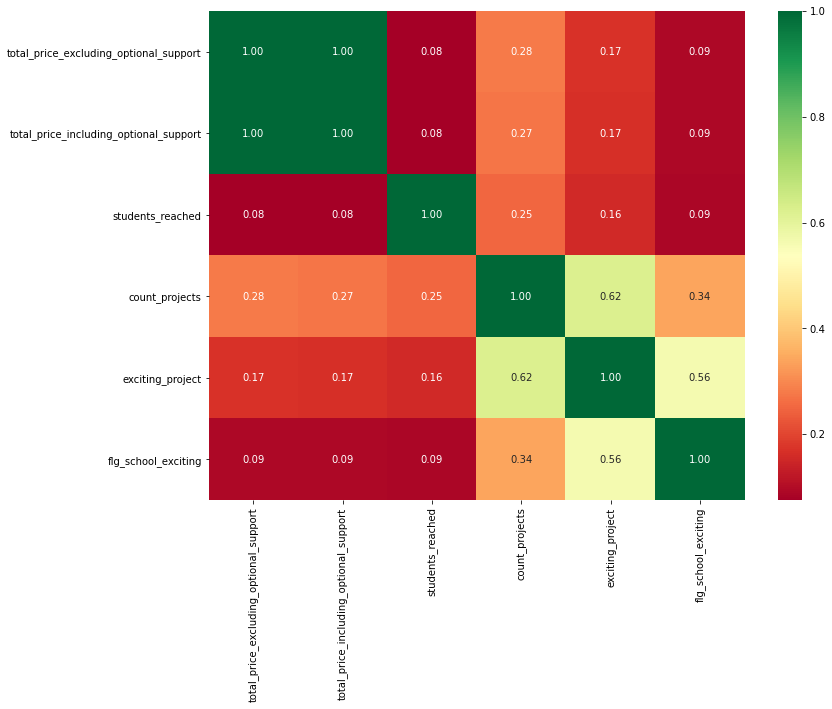

In [38]:
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat,cmap='RdYlGn',fmt='.2f',annot=True,)

### Teachers correlations

In [39]:
# Number of teachers on the dataset
len(df_projects.teacher_acctid.unique())

236289

In [40]:
##Teachers with excting project
len(df_projects[df_projects.is_exciting=='t'].teacher_acctid.unique())

28040

In [41]:
len(df_projects[df_projects.is_exciting=='t'].teacher_acctid.unique())/len(df_projects.teacher_acctid.unique())

0.11866824100994967

Serch for teachers with at least one project as excting and insert flg_teacher_exciting on df

In [42]:
exciting_teacher =df_projects[df_projects.is_exciting=='t'].reset_index().groupby(by='teacher_acctid').count()
exciting_teacher['flg_teacher_exciting']=1
exciting_teacher.rename(columns={'projectid': 'count_proj_teacher'}, inplace=True)
df_projects = df_projects.join(exciting_teacher[['count_proj_teacher','flg_teacher_exciting']], how='left', on='teacher_acctid')


In [43]:
df_projects['count_proj_teacher'] = df_projects['count_proj_teacher'].fillna(0)
df_projects['flg_teacher_exciting'] = df_projects['flg_teacher_exciting'].fillna(0)

In [44]:
df_projects.groupby('flg_teacher_exciting').teacher_acctid.nunique()

flg_teacher_exciting
0.00    208249
1.00     28040
Name: teacher_acctid, dtype: int64

Text(0.5, 1.0, 'Teachers with at least one exciting Project')

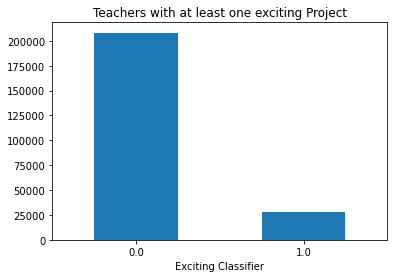

In [45]:

df_projects.groupby('flg_teacher_exciting').teacher_acctid.nunique().plot(kind='bar', stacked=True)
plt.xlabel('Exciting Classifier')
plt.xticks(rotation=0)
plt.title('Teachers with at least one exciting Project')

In [46]:
##group categories of techers

group_teacher = df_projects[['teacher_acctid', 'teacher_prefix', 'teacher_teach_for_america', 
       'teacher_ny_teaching_fellow','poverty_level','flg_teacher_exciting']].groupby(by=['teacher_acctid', 'teacher_prefix', 'teacher_teach_for_america', 
       'teacher_ny_teaching_fellow','poverty_level'],dropna=False).max().reset_index()

#group=df_projects[['schoolid','is_exciting']].groupby('schoolid').count()
group_teacher.set_index('teacher_acctid', inplace=True)

In [47]:
# group sum continuos variable

group= df_projects[['teacher_acctid', 'students_reached','exciting_project']].groupby(by='teacher_acctid',dropna=False).sum()

group_teacher = group_teacher.join(group, how='left')

In [48]:
# group count of projects
group_teacher['count_projects']=df_projects.reset_index()[['teacher_acctid','projectid']].groupby(by='teacher_acctid',dropna=False).count()['projectid']


### Correlation for categorical variables for teachers

In [49]:
cols =['teacher_prefix', 'teacher_teach_for_america', 
       'teacher_ny_teaching_fellow','poverty_level']
                                                                     
##creating df for chi square

df_chi_square=pd.DataFrame()
chi=[]
pval=[]
dof=[]
critical_value=[]
cramer_test=[]

## Critical value table for chi square

significance = 0.005
p = 1 - significance


for col in cols:
    contingency_table = pd.crosstab(group_teacher.flg_teacher_exciting,group_teacher[col])
    chi_x, pval_x, dof_x, exp_x = chi2_contingency(contingency_table)
    chi.append(chi_x)
    pval.append(pval_x)
    dof.append(dof_x)
    critical_value_x = chi2.ppf(p, dof_x)
    critical_value.append(critical_value_x)
    n=len(df_projects.dropna()) ### number on the sample
    cramer_test_x= np.sqrt(chi_x/(n*dof_x)) ##cramer's V test formula
    cramer_test.append(round(cramer_test_x,2))

df_chi_square['cols']=cols
df_chi_square['chi2']=chi
df_chi_square['pval']=pval
df_chi_square['dof']=dof
df_chi_square['critical value']=critical_value
df_chi_square['flg_critical']=df_chi_square['chi2']>df_chi_square['critical value']
df_chi_square['flg_pval'] =df_chi_square['pval']<0.05
df_chi_square['cramer_test']=cramer_test
df_chi_square

,cols,chi2,pval,dof,critical value,flg_critical,flg_pval,cramer_test
0,teacher_prefix,678.18,0.00,4,14.86,True,True,0.02
1,teacher_teach_for_america,1720.80,0.00,1,7.88,True,True,0.08
2,teacher_ny_teaching_fellow,7.12,0.01,1,7.88,False,True,0.00
3,poverty_level,230.28,0.00,3,12.84,True,True,0.02


american teachers has the percentage 10 %of projects classified as exctiting
what is almost the double of the global percentage (6%)


In [50]:
display(group_teacher.exciting_project.sum()/group_teacher.count_projects.sum())
display(group_teacher[group_teacher.teacher_teach_for_america=='t'].exciting_project.sum()/group_teacher[group_teacher.teacher_teach_for_america=='t'].count_projects.sum())

0.05865601008313509

0.10556471035619217

In [51]:
corrmat = group_teacher[['students_reached','count_projects','exciting_project','flg_teacher_exciting']].corr()
corrmat


,students_reached,count_projects,exciting_project,flg_teacher_exciting
students_reached,1.00,0.12,0.05,0.02
count_projects,0.12,1.00,0.40,0.21
exciting_project,0.05,0.40,1.00,0.75
flg_teacher_exciting,0.02,0.21,0.75,1.00


In [52]:
group_teacher.columns

Index(['teacher_prefix', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 'poverty_level', 'flg_teacher_exciting',
       'students_reached', 'exciting_project', 'count_projects'],
      dtype='object')

In [53]:
#Number of projects by teacher accordingly with teacher classifier
display(group_teacher[group_teacher.flg_teacher_exciting==1].describe())
display(group_teacher.describe())

,flg_teacher_exciting,students_reached,exciting_project,count_projects
count,29623.00,29623.00,29623.00,29623.00
mean,1.00,495.00,1.33,5.87
std,0.00,1849.81,1.09,11.71
min,1.00,0.00,1.00,1.00
25%,1.00,50.00,1.00,1.00
50%,1.00,130.00,1.00,3.00
75%,1.00,380.00,1.00,5.00
max,1.00,164768.00,41.00,246.00


,flg_teacher_exciting,students_reached,exciting_project,count_projects
count,242393.00,242393.00,242393.00,242393.00
mean,0.12,267.09,0.16,2.76
std,0.33,3909.98,0.58,5.60
min,0.00,0.00,0.00,1.00
25%,0.00,30.00,0.00,1.00
50%,0.00,78.00,0.00,1.00
75%,0.00,200.00,0.00,3.00
max,1.00,1002668.00,41.00,246.00


In [54]:
group_teacher.poverty_level.dropna().unique()

array(['high poverty', 'highest poverty', 'moderate poverty',
       'low poverty'], dtype=object)

Text(0.5, 1.0, 'Count Schools')

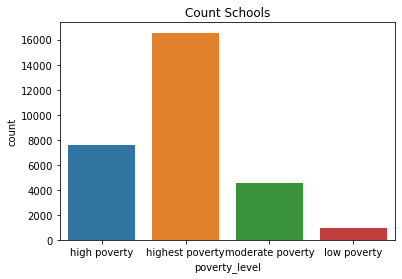

In [55]:
sns.countplot(x='poverty_level',data=group_teacher[group_teacher.flg_teacher_exciting==1],
             order=['high poverty', 'highest poverty', 'moderate poverty',
       'low poverty'])
plt.title('Count Schools')

Text(0.5, 1.0, 'Count Schools')

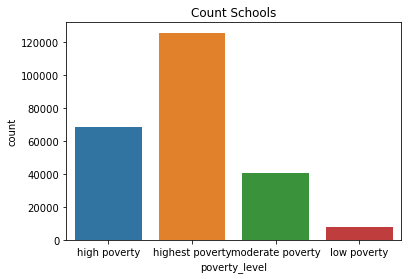

In [56]:
sns.countplot(x='poverty_level',data=group_teacher,
              order=['high poverty', 'highest poverty', 'moderate poverty',
       'low poverty'])
plt.title('Count Schools')

#### Exciting  projects are very concentrated in few schools (30% of the total schools) and teachers (11% of the total).
#### Schools and teachers with at least one excting project has a double average of projects released .
#### Schools and teachers with at least one excting project has a better ratio of excting/total projects.

### treating outliers/errors

We will consider outliers numbers above median + 2 * std and replace it by median

and drop null rows

### finding correlations

 getting dummy variable for excting projects

In [57]:
#sns.pairplot(df_projects[['fulfillment_labor_materials',
#       'total_price_excluding_optional_support',
#       'total_price_including_optional_support','students_reached','exciting_dummy']],
#            hue='exciting_dummy')

Correlation between total_price_excluding_optional_support and total_price_including_optional_support too high so we drop total_price_excluding_optional_support
Cannot achive more conclusions with correlations

# Donations Dataset

In [58]:

df_donations = raw_donations
df_donations.head()

,donationid,donor_acctid,donor_city,donor_state,donor_zip,is_teacher_acct,donation_timestamp,donation_to_project,donation_optional_support,donation_total,dollar_amount,donation_included_optional_support,payment_method,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,donation_message
projectid,,,,,,,,,,,,,,,,,,,,
ffffac55ee02a49d1abc87ba6fc61135,431d720bc3dfd75ae445a5eaa0b0638d,22cbc920c9b5fa08dfb331422f5926b5,Peachtree City,GA,30269.00,f,2011-08-25 14:27:34.807,42.50,7.50,50.00,10_to_100,t,no_cash_received,f,t,f,f,f,f,I gave to this project because I support the e...
ffffac55ee02a49d1abc87ba6fc61135,fcfedba1c8a0ba77d280cace80a909f6,521f1830a77c9dbbf8119d99c6206a16,NaN,GA,NaN,f,2011-11-04 07:54:21.552,26.83,4.73,31.56,10_to_100,t,creditcard,f,t,f,f,f,f,I donated because I want to support kids in Ge...
ffffac55ee02a49d1abc87ba6fc61135,3fa95d29986aa6f401c6719ced3a3ce7,1e0a63fc8141c7ba26b8b44ca0871b90,Rockville,MD,20853.00,f,2011-11-02 22:53:53.019,55.35,0.00,55.35,10_to_100,f,no_cash_received,t,f,f,f,t,f,The Spark's 'pet' projects include those which...
ffffac55ee02a49d1abc87ba6fc61135,020ad6bd5e88a35741d23b5e08f8b8e8,1d4acb508df29d5f1cc6d382969576cb,Salem,IN,47167.00,f,2011-11-03 23:54:01.109,8.50,1.50,10.00,10_to_100,t,paypal,f,f,f,f,f,f,I gave to this project because Education is im...
ffffac55ee02a49d1abc87ba6fc61135,4b44b03f304d6425ae94446686f93cd6,59c3c3cfcccc53ae855f7eee911c478b,anonymous,NaN,0.00,f,2011-11-02 23:21:00.043,20.00,0.00,20.00,10_to_100,f,no_cash_received,f,f,t,f,t,f,I lent a paw to help the children in this clas...


In [59]:
df_donations = df_donations.join(raw_projects[['date_posted','school_state']], how ='left')
df_donations = df_donations[df_donations.date_posted < '2014-01-01']
len(df_donations)

3097989

In [60]:
df_donations.donation_total.mean()

76.67690734860867

Before group donations let's get the length of the messages

In [61]:
message_len = []

for row in df_donations.donation_message:
    message_len.append(len(str(row)))
    
df_donations['message_len']=message_len

let's see if the project has donations from differen states

In [62]:
flg_diff_estate=[]

for a,b in zip(df_donations.donor_state, df_donations.school_state):
    if a ==b:
        flg_diff_estate.append(1)
    else:
        flg_diff_estate.append(0)

df_donations['donor_diff_estate']= flg_diff_estate

create a dummy with is_teacher_acct                                   

In [63]:
df_donations['teacher_donor_dummy']= pd.get_dummies(df_donations. is_teacher_acct,drop_first=True)

group the dataset

In [64]:
df_donations['n_donor']=1
df_donations_grouped= df_donations.groupby(by=['projectid']).sum()


In [65]:
df_donations_grouped.drop(['donor_zip'], axis=1, inplace=True)



In [66]:
df_donations_grouped = df_donations_grouped.join(raw_outcomes[[ 'at_least_1_teacher_referred_donor', 'fully_funded',
       'great_chat','is_exciting']], how ='left')

Create dummy with the outcomes

In [67]:
dummies= pd.get_dummies(df_donations_grouped[['is_exciting', 'at_least_1_teacher_referred_donor', 'fully_funded',
       'great_chat']],drop_first=True)
dummies.columns


Index(['is_exciting_t', 'at_least_1_teacher_referred_donor_t',
       'fully_funded_t', 'great_chat_t'],
      dtype='object')

In [68]:

df_donations_grouped['at_least_1_teacher_referred_donor_dummy'] =dummies['at_least_1_teacher_referred_donor_t']
df_donations_grouped[ 'great_chat_dummy'] =dummies[ 'great_chat_t']
df_donations_grouped['is_exciting_dummy'] =dummies['is_exciting_t']

df_donations_grouped.drop(['at_least_1_teacher_referred_donor', 'fully_funded', 'great_chat',
       'is_exciting'], axis=1, inplace=True)
df_donations_grouped.head()

,donation_to_project,donation_optional_support,donation_total,message_len,donor_diff_estate,teacher_donor_dummy,n_donor,at_least_1_teacher_referred_donor_dummy,great_chat_dummy,is_exciting_dummy
projectid,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,1273.82,224.79,1498.61,296,1,1.00,3,0,0,0
00002bff514104264a6b798356fdd893,477.32,84.23,561.55,292,1,0.00,2,0,0,0
00002d691c05c51a5fdfbb2baef0ba25,102.00,18.00,120.00,573,3,1.00,5,0,1,0
0000b38bbc7252972f7984848cf58098,547.86,96.68,644.54,349,0,0.00,2,0,0,0
0000ee613c92ddc5298bf63142996a5c,384.86,67.92,452.78,508,1,2.00,6,1,0,0


In [69]:
corrmat=df_donations_grouped.corr()
corrmat['is_exciting_dummy']

donation_to_project                       0.04
donation_optional_support                 0.04
donation_total                            0.04
message_len                               0.23
donor_diff_estate                         0.17
teacher_donor_dummy                       0.11
n_donor                                   0.20
at_least_1_teacher_referred_donor_dummy   0.49
great_chat_dummy                          0.37
is_exciting_dummy                         1.00
Name: is_exciting_dummy, dtype: float64

<AxesSubplot:>

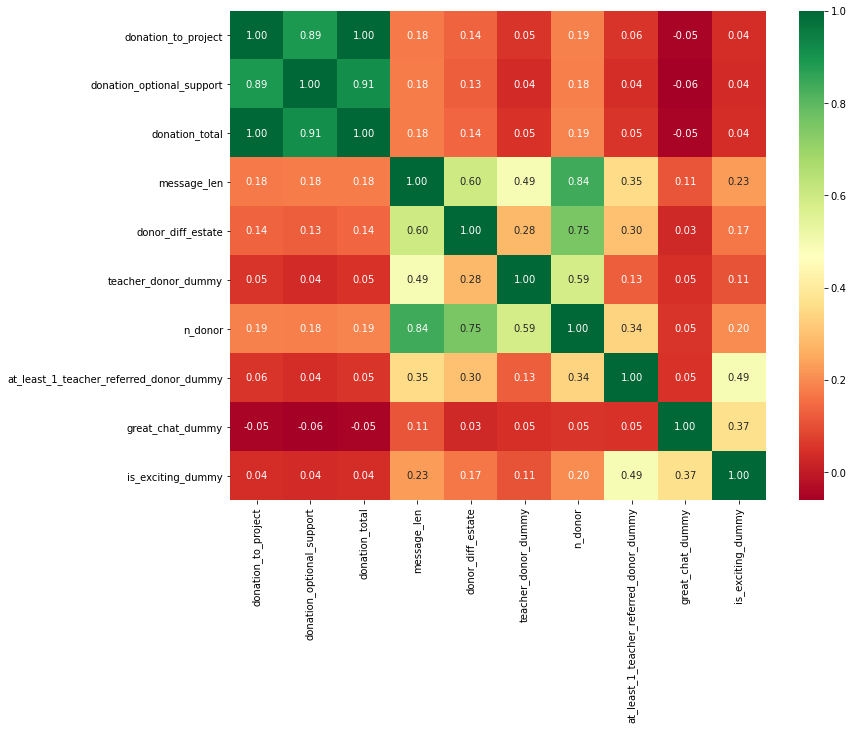

In [70]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,cmap='RdYlGn',fmt='.2f',annot=True,)

## Projects correlations

In [71]:
group_don =df_donations[['donor_diff_estate','teacher_donor_dummy','n_donor']].reset_index().groupby(by='projectid').sum()
df_projects = df_projects.join(group_don, how='left')

In [72]:
cols =['primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 
       'resource_type','eligible_almost_home_match','grade_level','eligible_double_your_impact_match','flg_school_exciting',
       'flg_teacher_exciting']
                                                                     
##creating df for chi square

df_chi_square=pd.DataFrame()
chi=[]
pval=[]
dof=[]
critical_value=[]
cramer_test=[]

## Critical value table for chi square

significance = 0.05
p = 1 - significance


for col in cols:
    contingency_table = pd.crosstab(df_projects.exciting_project,df_projects[col])
    chi_x, pval_x, dof_x, exp_x = chi2_contingency(contingency_table)
    chi.append(chi_x)
    pval.append(pval_x)
    dof.append(dof_x)
    critical_value_x = chi2.ppf(p, dof_x)
    critical_value.append(critical_value_x)
    n=len(df_projects.dropna()) ### number on the sample
    cramer_test_x= np.sqrt(chi_x/(n*dof_x)) ##cramer's V test formula
    cramer_test.append(round(cramer_test_x,2))

df_chi_square['cols']=cols
df_chi_square['chi2']=chi
df_chi_square['pval']=pval
df_chi_square['dof']=dof
df_chi_square['critical value']=critical_value
df_chi_square['flg_critical']=df_chi_square['chi2']>df_chi_square['critical value']
df_chi_square['flg_pval'] =df_chi_square['pval']<0.05
df_chi_square['cramer_test']=cramer_test
df_chi_square

,cols,chi2,pval,dof,critical value,flg_critical,flg_pval,cramer_test
0,primary_focus_subject,519.12,0.00,26,38.89,True,True,0.01
1,primary_focus_area,348.57,0.00,6,12.59,True,True,0.01
2,secondary_focus_subject,393.84,0.00,26,38.89,True,True,0.01
3,secondary_focus_area,85.53,0.00,6,12.59,True,True,0.01
4,resource_type,382.35,0.00,5,11.07,True,True,0.02
5,eligible_almost_home_match,12.83,0.00,1,3.84,True,True,0.01
6,grade_level,63.03,0.00,3,7.81,True,True,0.01
7,eligible_double_your_impact_match,31.90,0.00,1,3.84,True,True,0.01
8,flg_school_exciting,22120.29,0.00,1,3.84,True,True,0.28
9,flg_teacher_exciting,117914.83,0.00,1,3.84,True,True,0.64


In [73]:
corrmat =df_projects[['fulfillment_labor_materials',
       
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match','count_proj_school',
                     'donor_diff_estate','teacher_donor_dummy','n_donor','exciting_project',]].corr()

corrmat

,fulfillment_labor_materials,total_price_including_optional_support,students_reached,count_proj_school,donor_diff_estate,teacher_donor_dummy,n_donor,exciting_project
fulfillment_labor_materials,1.00,-0.00,-0.00,0.08,0.17,0.08,0.14,0.15
total_price_including_optional_support,-0.00,1.00,0.00,-0.00,0.05,0.02,0.08,-0.00
students_reached,-0.00,0.00,1.00,-0.00,-0.00,0.00,0.00,-0.00
count_proj_school,0.08,-0.00,-0.00,1.00,0.09,0.12,0.12,0.11
donor_diff_estate,0.17,0.05,-0.00,0.09,1.00,0.28,0.75,0.17
teacher_donor_dummy,0.08,0.02,0.00,0.12,0.28,1.00,0.59,0.11
n_donor,0.14,0.08,0.00,0.12,0.75,0.59,1.00,0.20
exciting_project,0.15,-0.00,-0.00,0.11,0.17,0.11,0.20,1.00


<AxesSubplot:>

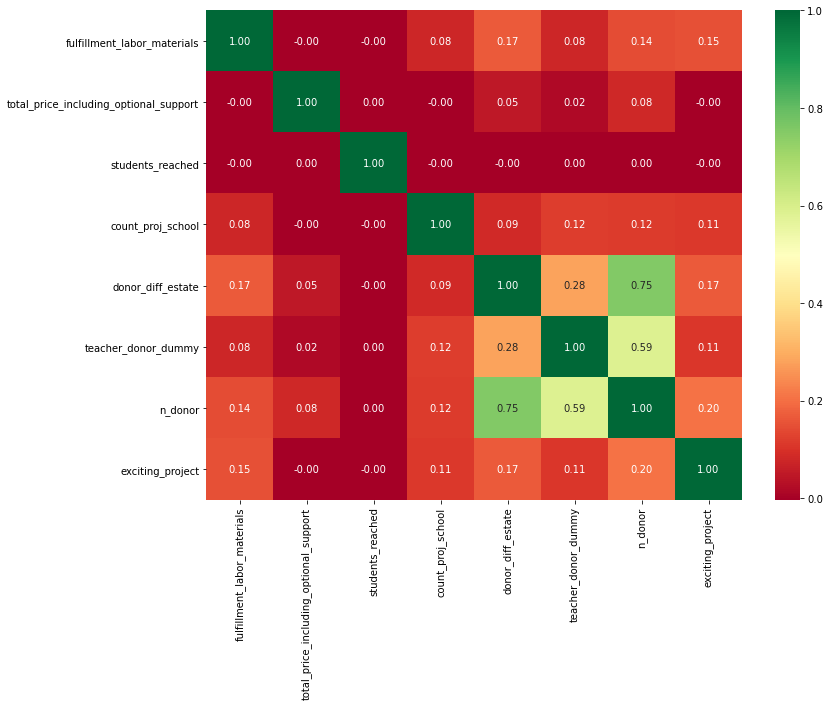

In [74]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,cmap='RdYlGn',fmt='.2f',annot=True,)

## Prepare dataset for model

In [75]:
df_model = df_projects.copy()

display(len(df_model))


df_model = df_model[['school_metro','teacher_teach_for_america','poverty_level',
                       'flg_school_exciting','flg_teacher_exciting','count_proj_school',
                       'count_proj_teacher','exciting_project']]
len(df_model)

619326

619326

In [76]:
group_don =df_donations[['donor_diff_estate','teacher_donor_dummy','n_donor']].reset_index().groupby(by='projectid').sum()
df_model = df_model.join(group_don, how='left')
len(df_model)

619326

In [78]:
dummies=pd.get_dummies(df_projects[['school_metro','teacher_teach_for_america','poverty_level']])

df_model= df_model.join(dummies,how='left')
df_model.drop(columns=['school_metro','teacher_teach_for_america','poverty_level'], inplace=True)

### Treating outliers

In [79]:
display(len(df_model))
df_model.dropna(inplace=True)
display(len(df_model))

619326

525042

In [80]:
df_model.describe()

,flg_school_exciting,flg_teacher_exciting,count_proj_school,count_proj_teacher,exciting_project,donor_diff_estate,teacher_donor_dummy,n_donor,school_metro_rural,school_metro_suburban,school_metro_urban,teacher_teach_for_america_f,teacher_teach_for_america_t,poverty_level_high poverty,poverty_level_highest poverty,poverty_level_low poverty,poverty_level_moderate poverty
count,525042.00,525042.00,525042.00,525042.00,525042.00,525042.00,525042.00,525042.00,525042.00,525042.00,525042.00,525042.00,525042.00,525042.00,525042.00,525042.00,525042.00
mean,0.66,0.27,3.48,0.66,0.07,2.63,0.68,5.90,0.11,0.23,0.54,0.94,0.06,0.26,0.59,0.02,0.13
std,0.47,0.44,5.93,2.13,0.26,4.43,3.07,8.23,0.31,0.42,0.50,0.24,0.24,0.44,0.49,0.16,0.34
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,1.00,0.00,0.00,1.00,0.00,3.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00
75%,1.00,1.00,4.00,1.00,0.00,3.00,1.00,7.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00
max,1.00,1.00,52.00,41.00,1.00,392.00,390.00,607.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Replace outliers by median

cols=['count_proj_school','count_proj_teacher']

for col in cols:
    col_treated = []
    threshold = df_model[col].median() + 2 * df_model[col].std()
    for r in df_model[col]:
        if r > threshold or r is None:
            col_treated.append(df_model[col].median())
        else:
            col_treated.append(r)
    df_model[col]=col_treated



In [81]:
X = df_model[['flg_teacher_exciting', 'count_proj_school',
       'count_proj_teacher', 'exciting_project', 'donor_diff_estate',
       'teacher_donor_dummy',
       'school_metro_urban',
       'teacher_teach_for_america_t', 'poverty_level_low poverty',
       ]]
y = df_model['flg_school_exciting']

## Logistic Regression Model

In [82]:
X_train, X_test, y_train, y_test = train_test_split(df_model.drop('exciting_project',axis=1), 
                                                    df_model['exciting_project'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))